# Exploring Key Factors Influencing GitHub Repository Popularity

What factors significantly influence the popularity of a repository (i.e., the number of Stars)? Can we predict the number of Stars a repository receives using these factors?

In [1]:
#Load library
library(readr)
library(rsample)
library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(tidyverse)
library(modelr)
library(car)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ recipes      1.1.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object 

In [2]:
#Load dataset
repositories <- read.csv("repositories.csv")

## Introduction

## Methods and Results

- Clean the dataset
- data description + EDA
- (prediction)split training&test
- baseline model? can we use the full model rather than the simple model as the baseline since we are taking forward selection?
- forward selection
- fit the model
- assumptions??
- interpret their coefficients
- (prediction) maybe cross-valiation on the training set
- (prediction) test the model on the test set

FEEL FREE TO EDIT!!

In [3]:
head(repositories)

Name                       
1 freeCodeCamp               
2 free-programming-books     
3 awesome                    
4 996.ICU                    
5 coding-interview-university
6 public-apis                
  Description                                                                             
1 freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.         
2 :books: Freely available programming books                                              
3 😎 Awesome lists about all kinds of interesting topics                                  
4 Repo for counting stars and contributing. Press F to pay respect to glorious developers.
5 A complete computer science study plan to become a software engineer.                   
6 A collective list of free APIs                                                          
  URL                                                      
1 https://github.com/freeCodeCamp/freeCodeCamp             
2 https://github.com/EbookFoundation/free-programming-books
3 https://github.com/sindresorhus/awesome                  
4 https://github.com/996icu/996.ICU                        
5 https://github.com/jwasham/coding-interview-university   
6 https://github.com/public-apis/public-apis               
  Created.At           Updated.At          
1 2014-12-24T17:49:19Z 2023-09-21T11:32:33Z
2 2013-10-11T06:50:37Z 2023-09-21T11:09:25Z
3 2014-07-11T13:42:37Z 2023-09-21T11:18:22Z
4 2019-03-26T07:31:14Z 2023-09-21T08:09:01Z
5 2016-06-06T02:34:12Z 2023-09-21T10:54:48Z
6 2016-03-20T23:49:42Z 2023-09-21T11:22:06Z
  Homepage                                                  Size   Stars  Forks
1 http://contribute.freecodecamp.org/                       387451 374074 33599
2 https://ebookfoundation.github.io/free-programming-books/  17087 298393 57194
3                                                             1441 269997 26485
4 https://996.icu                                           187799 267901 21497
5                                                            20998 265161 69434
6 http://public-apis.org                                      5088 256615 29254
  Issues ⋯ Has.Issues Has.Projects Has.Downloads Has.Wiki Has.Pages
1   248  ⋯ True       True         True          False    True     
2    46  ⋯ True       False        True          False    True     
3    61  ⋯ True       False        True          False    True     
4 16712  ⋯ False      False        True          False    False    
5    56  ⋯ True       False        True          False    False    
6   191  ⋯ True       False        True          False    False    
  Has.Discussions Is.Fork Is.Archived Is.Template Default.Branch
1 False           False   False       False       main          
2 False           False   False       False       main          
3 False           False   False       False       main          
4 False           False   True        False       master        
5 False           False   False       False       main          
6 False           False   False       False       master

In [4]:
#Remove rows with missing values
repo_tidy <- repositories %>%
    drop_na()
colnames(repo_tidy)

[1] "Name"            "Description"     "URL"             "Created.At"     
 [5] "Updated.At"      "Homepage"        "Size"            "Stars"          
 [9] "Forks"           "Issues"          "Watchers"        "Language"       
[13] "License"         "Topics"          "Has.Issues"      "Has.Projects"   
[17] "Has.Downloads"   "Has.Wiki"        "Has.Pages"       "Has.Discussions"
[21] "Is.Fork"         "Is.Archived"     "Is.Template"     "Default.Branch"

In [5]:
# !!! here is my code for data wrangling where i also change the binary variables into `factor` type, 
# and i remove some of the input variables

# i have not run this code so feel free to share your wrangling method and code
# or rewrite this part especially for the preliminary variable selection part!!
data_repo_clean <- repo_tidy %>%
  mutate(across(c(Has.Issues, Has.Projects, Has.Downloads, Has.Wiki, Has.Pages, 
                  Has.Discussions, Is.Archived, Is.Template), as.factor)) %>%
  select(Size, Stars, Forks, Issues, Has.Issues, Has.Projects, Has.Downloads, Has.Wiki, Has.Pages, Has.Discussions, Is.Archived, Is.Template)

head(data_repo_clean)

Size   Stars  Forks Issues Has.Issues Has.Projects Has.Downloads Has.Wiki
1 387451 374074 33599   248  True       True         True          False   
2  17087 298393 57194    46  True       False        True          False   
3   1441 269997 26485    61  True       False        True          False   
4 187799 267901 21497 16712  False      False        True          False   
5  20998 265161 69434    56  True       False        True          False   
6   5088 256615 29254   191  True       False        True          False   
  Has.Pages Has.Discussions Is.Archived Is.Template
1 True      False           False       False      
2 True      False           False       False      
3 True      False           False       False      
4 False     False           True        False      
5 False     False           False       False      
6 False     False           False       False

#### data split

In [6]:
#Split the dataset in 0.6
set.seed(123)

repo_split <- 
    data_repo_clean %>%
    initial_split(prop = 0.6, strata = Stars)

training_repo <- training(repo_split)
testing_repo <- testing(repo_split)

#### baseline model

In [7]:
# full model
repo_full_OLS <- lm(Stars ~ ., data = training_repo)

repo_full_OLS_results <- tidy(repo_full_OLS)

testing_repo <- testing_repo |>
    add_predictions(repo_full_OLS, var="pred_full_OLS")

repo_full_OLS_results
head(repo_full_OLS_results)

term                estimate      std.error    statistic   p.value      
1  (Intercept)          1.113818e+03 1.039536e+02  10.7145697  8.924855e-27
2  Size                 3.378433e-06 1.254491e-05   0.2693071  7.876938e-01
3  Forks                1.656748e+00 7.217402e-03 229.5490060  0.000000e+00
4  Issues               2.756035e+00 4.558267e-02  60.4623581  0.000000e+00
5  Has.IssuesTrue       2.399161e+01 5.301769e+01   0.4525209  6.508945e-01
6  Has.ProjectsTrue    -2.563964e+02 3.292043e+01  -7.7883674  6.838210e-15
7  Has.DownloadsTrue   -2.464407e+02 9.448540e+01  -2.6082410  9.101935e-03
8  Has.WikiTrue        -2.201769e+02 2.810511e+01  -7.8340519  4.759655e-15
9  Has.PagesTrue        2.217952e+02 2.367166e+01   9.3696515  7.389200e-21
10 Has.DiscussionsTrue  7.682286e+02 2.773443e+01  27.6994580 2.214656e-168
11 Is.ArchivedTrue     -1.402855e+02 3.674903e+01  -3.8173918  1.349329e-04
12 Is.TemplateTrue     -4.092400e+02 1.140407e+02  -3.5885422  3.326552e-04

term             estimate      std.error    statistic   p.value     
1 (Intercept)       1.113818e+03 1.039536e+02  10.7145697 8.924855e-27
2 Size              3.378433e-06 1.254491e-05   0.2693071 7.876938e-01
3 Forks             1.656748e+00 7.217402e-03 229.5490060 0.000000e+00
4 Issues            2.756035e+00 4.558267e-02  60.4623581 0.000000e+00
5 Has.IssuesTrue    2.399161e+01 5.301769e+01   0.4525209 6.508945e-01
6 Has.ProjectsTrue -2.563964e+02 3.292043e+01  -7.7883674 6.838210e-15

In [8]:
# RMSE of the full model
rmse_full <- 
    testing_repo %>% 
    mutate(pred_error = Stars - pred_full_OLS) %>%
    summarise(RMSE = sqrt(mean(pred_error ^ 2))) %>%
    pull()


repo_RMSE_models <- tibble(
  Model = "OLS Full Regression",
  RMSE = rmse_full)

repo_RMSE_models

Model               RMSE    
1 OLS Full Regression 3146.908

#### forward selection

In [9]:
# current number of columns in the wrangled dataset
length(colnames(data_repo_clean))

[1] 12

In [10]:
head(training_repo)

Size   Stars Forks Issues Has.Issues Has.Projects Has.Downloads Has.Wiki
1   2411 237    32   36     True       True         True          False   
2 169493 237   125   62     True       True         True          True    
3    685 237    28    9     True       True         True          True    
4    900 237    36   23     True       False        True          True    
5 306952 237    74   57     True       True         True          True    
6    679 237    72   17     True       True         False         True    
  Has.Pages Has.Discussions Is.Archived Is.Template
1 False     False           False       False      
2 False     True            False       False      
3 False     True            False       False      
4 True      False           False       False      
5 False     True            False       False      
6 False     False           False       False

In [11]:
# forward selection
repo_forward_sel <- regsubsets(x = Stars ~ ., nvmax = 11,
                                  data = training_repo,
                                  method = "forward")
repo_forward_summary <- summary(repo_forward_sel)
repo_forward_summary


Subset selection object
Call: regsubsets.formula(x = Stars ~ ., nvmax = 11, data = training_repo, 
    method = "forward")
11 Variables  (and intercept)
                    Forced in Forced out
Size                    FALSE      FALSE
Forks                   FALSE      FALSE
Issues                  FALSE      FALSE
Has.IssuesTrue          FALSE      FALSE
Has.ProjectsTrue        FALSE      FALSE
Has.DownloadsTrue       FALSE      FALSE
Has.WikiTrue            FALSE      FALSE
Has.PagesTrue           FALSE      FALSE
Has.DiscussionsTrue     FALSE      FALSE
Is.ArchivedTrue         FALSE      FALSE
Is.TemplateTrue         FALSE      FALSE
1 subsets of each size up to 11
Selection Algorithm: forward
          Size Forks Issues Has.IssuesTrue Has.ProjectsTrue Has.DownloadsTrue
1  ( 1 )  " "  "*"   " "    " "            " "              " "              
2  ( 1 )  " "  "*"   "*"    " "            " "              " "              
3  ( 1 )  " "  "*"   "*"    " "            " "              

In [12]:
repo_forward_summary_df <- tibble(
    n_input_variables = 1:11,
    RSQ = repo_forward_summary$rsq,
    RSS = repo_forward_summary$rss,
    ADJ_R2 = repo_forward_summary$adjr2,
    Cp = repo_forward_summary$cp,
    BIC = repo_forward_summary$bic,
)
repo_forward_summary_df

n_input_variables RSQ       RSS          ADJ_R2    Cp          BIC      
1   1                0.3333308 1.395552e+12 0.3333257 5468.749781 -52287.46
2   2                0.3534470 1.353442e+12 0.3534370 1412.898041 -56228.60
3   3                0.3583562 1.343166e+12 0.3583413  424.619700 -57200.16
4   4                0.3595923 1.340578e+12 0.3595724  177.279653 -57437.17
5   5                0.3600232 1.339676e+12 0.3599984   92.360638 -57512.24
6   6                0.3603109 1.339074e+12 0.3602812   36.316745 -57558.49
7   7                0.3603823 1.338925e+12 0.3603476   23.922696 -57561.12
8   8                0.3604465 1.338790e+12 0.3604069   12.958281 -57562.31
9   9                0.3604797 1.338721e+12 0.3604351    8.271656 -57557.23
10 10                0.3604807 1.338719e+12 0.3604311   10.072526 -57545.66
11 11                0.3604810 1.338718e+12 0.3604265   12.000000 -57533.97

**The forward algorithm would select a generative model with 9 variables using the adjusted $R^2$**.

**The forward algorithm would select a predictive model with 8 variables using BIC**.

**The forward algorithm would select a predictive model with 9 variables using Cp**.

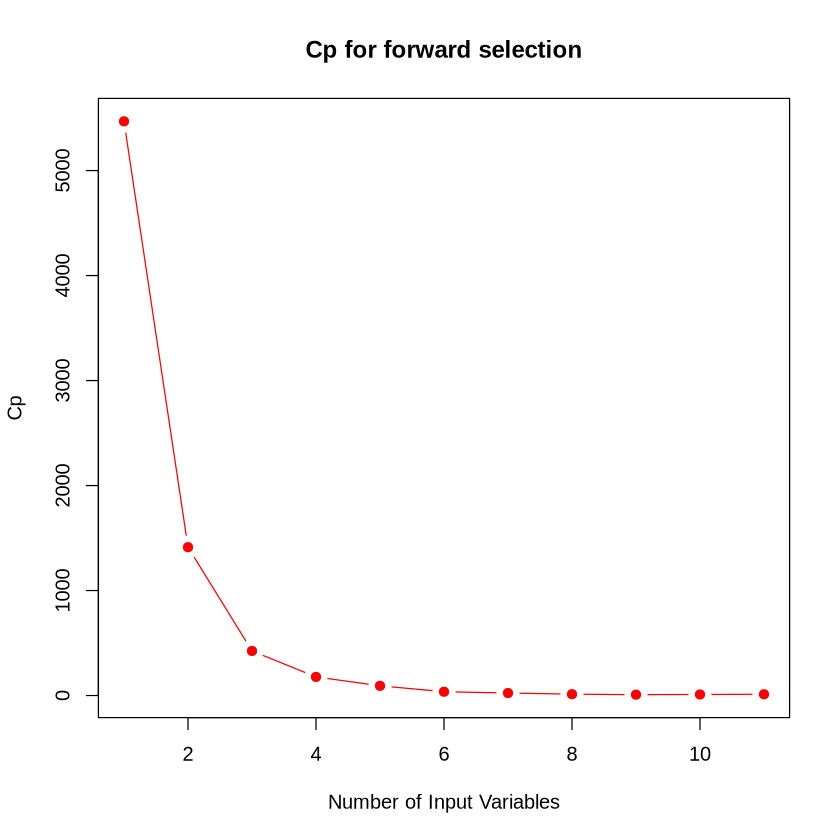

In [13]:
plot(summary(repo_forward_sel)$cp,
     main = "Cp for forward selection",
     xlab = "Number of Input Variables", 
     ylab = "Cp",
     type = "b",
     pch = 19,
     col = "red"
)

In [14]:
# I use min cp value here to select variables for no reasons (we used in worksheet)... please change to other metrics if more reasonable!!!
cp_min = which.min(repo_forward_summary$cp) 

selected_var <- names(coef(repo_forward_sel, cp_min))[-1]
selected_var

[1] "Forks"               "Issues"              "Has.ProjectsTrue"   
[4] "Has.DownloadsTrue"   "Has.WikiTrue"        "Has.PagesTrue"      
[7] "Has.DiscussionsTrue" "Is.ArchivedTrue"     "Is.TemplateTrue"

In [15]:
selected_var <- gsub("True", "", selected_var)
selected_var

[1] "Forks"           "Issues"          "Has.Projects"    "Has.Downloads"  
[5] "Has.Wiki"        "Has.Pages"       "Has.Discussions" "Is.Archived"    
[9] "Is.Template"

In [16]:
# subset only the predictors selected from the full dataset
training_subset <- 
    training_repo %>% 
    select(all_of(selected_var), Stars)

testing_subset <- 
    testing_repo %>% 
    select(all_of(selected_var), Stars)

head(training_subset)

Forks Issues Has.Projects Has.Downloads Has.Wiki Has.Pages Has.Discussions
1  32   36     True         True          False    False     False          
2 125   62     True         True          True     False     True           
3  28    9     True         True          True     False     True           
4  36   23     False        True          True     True      False          
5  74   57     True         True          True     False     True           
6  72   17     True         False         True     False     False          
  Is.Archived Is.Template Stars
1 False       False       237  
2 False       False       237  
3 False       False       237  
4 False       False       237  
5 False       False       237  
6 False       False       237

#### fit the model

In [17]:
# I think using 9 variable to build our model is reasonable

model = lm(Stars ~ ., data = training_subset)
summary(model)


Call:
lm(formula = Stars ~ ., data = training_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-399632    -509    -278     -59  316872 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.132e+03  9.574e+01  11.828  < 2e-16 ***
Forks                1.657e+00  7.213e-03 229.672  < 2e-16 ***
Issues               2.757e+00  4.555e-02  60.529  < 2e-16 ***
Has.ProjectsTrue    -2.553e+02  3.283e+01  -7.777 7.47e-15 ***
Has.DownloadsTrue   -2.439e+02  9.431e+01  -2.586 0.009714 ** 
Has.WikiTrue        -2.185e+02  2.786e+01  -7.843 4.44e-15 ***
Has.PagesTrue        2.222e+02  2.366e+01   9.389  < 2e-16 ***
Has.DiscussionsTrue  7.691e+02  2.768e+01  27.791  < 2e-16 ***
Is.ArchivedTrue     -1.418e+02  3.659e+01  -3.877 0.000106 ***
Is.TemplateTrue     -4.095e+02  1.140e+02  -3.591 0.000330 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3221 on 129006 degrees of freedom
Multiple R-squar

In [18]:
#As we can see every p value is lower than the significant value, so all the predictors here has significantly impact on our response
#now check the interaction term
#model_interactive = lm(Stars ~ Forks * Issues * Has.Projects * Has.Downloads * Has.Wiki * Has.Pages * Has.Discussions * Is.Archived * Is.Template, data = training_subset)
#summary(model_interactive)
#this won't work, so we might ignore the inte

#### test on the test data

In [50]:
# reduced model
rmse_red <- 
    testing_subset %>%
    add_predictions(model, var = 'pred_reduced_reg') %>%
    mutate(pred_red_error = Stars - pred_reduced_reg) %>%
    summarize(RMSE = sqrt(mean(pred_red_error^2))) %>%
    pull()      

repo_RMSE_models_expanded <- 
    bind_rows(
        repo_RMSE_models,
        tibble(Model = "OLS Reduced Regression",
               RMSE = rmse_red)
    )

repo_RMSE_models_expanded

Model                  RMSE    
1 OLS Full Regression    3146.908
2 OLS Reduced Regression 3146.949

#### Check assumptions

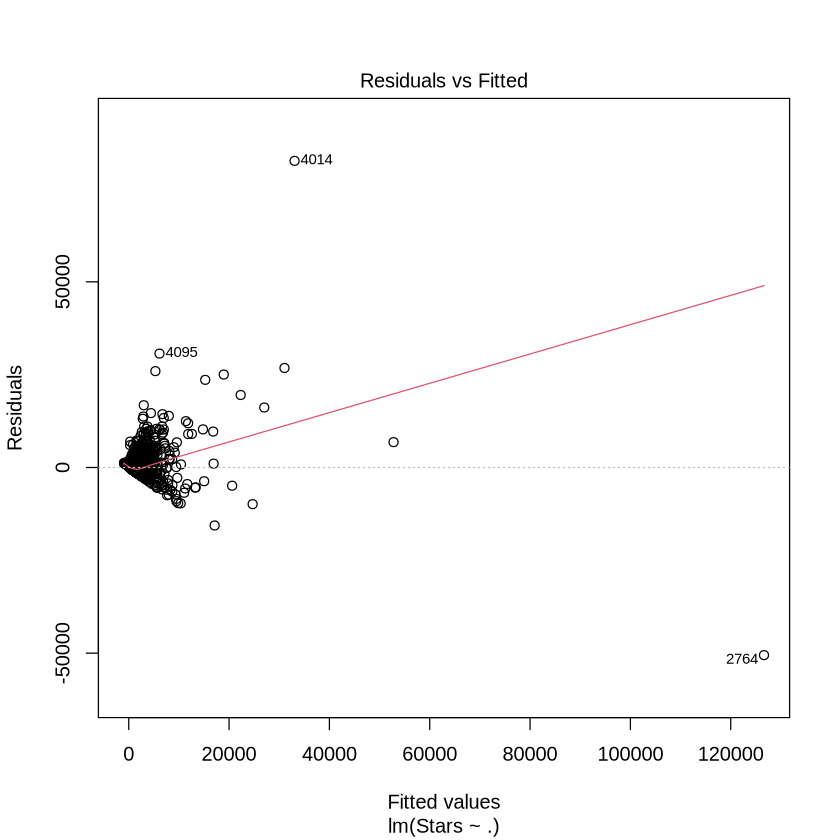

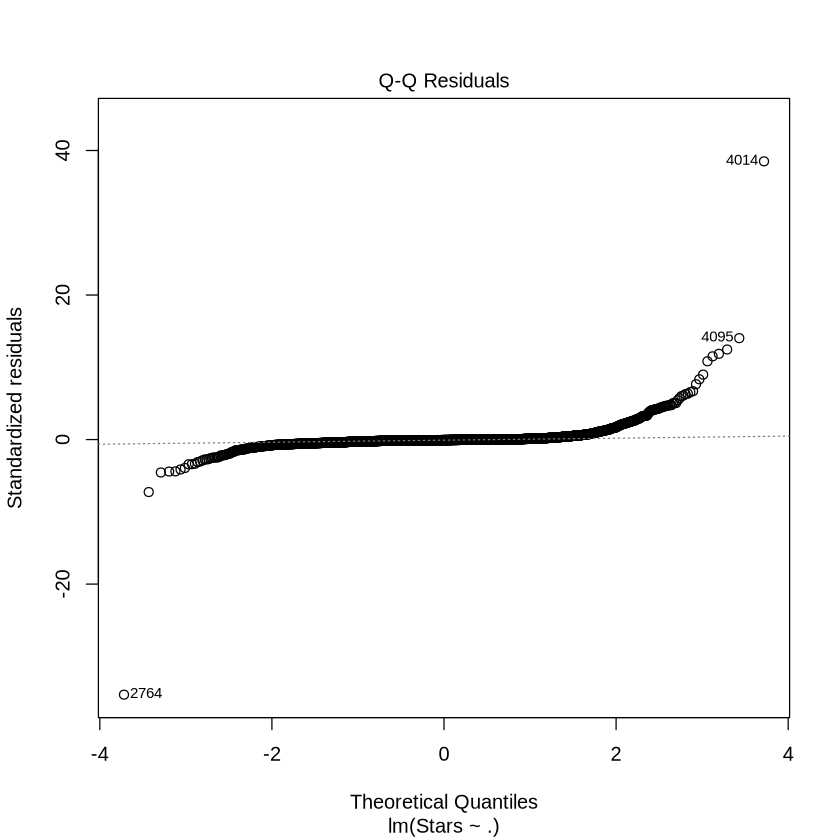

In [55]:
# the plots don't show good outcomes...should we just skip the assumptions??

set.seed(123)
training_sample  <- rep_sample_n(training_subset, size = 5000, replace = FALSE)

model_sample <- lm(Stars ~ ., data = training_sample)

plot(model_sample, which = 1)  # Residuals vs Fitted
plot(model_sample, which = 2)  # Q-Q plot

## Discussion

## References